# Strojno učenje

### PAZI ce je f-score zelo majhen, je lahko ker dobi za določen class z nizkim N vrednost 0 in naredi povprečje!

In [14]:
import warnings
warnings.filterwarnings('always')

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("data_cleaned.xlsx")
df = df.drop('Unnamed: 0', axis=1)

In [16]:
#Poskusimo narediti le dva classa

#df['Uspesnost'].replace({1:0,2: 0, 3: 1}, inplace=True)

In [17]:
#df = df.apply(pd.to_numeric, errors='coerce')

In [18]:
df.head()

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,2,5,3,3,2,0,1,0,17,27,19,17,25,26
1,3,2,3,2,2,0,1,0,20,22,20,31,33,20
2,2,4,2,2,2,0,1,0,27,30,25,25,25,23
3,3,2,2,2,1,0,1,0,20,17,21,25,34,25
4,2,4,2,2,3,0,1,1,21,24,23,23,20,24


In [19]:
X = df.drop("Uspesnost", axis=1)
y = df["Uspesnost"]

In [20]:
from numpy import unique
classes = unique(y)
total = len(y)
for c in classes:
 n_examples = len(y[y==c])
 percent = n_examples / total * 100
 print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

> Class=1 : 5/74 (6.8%)
> Class=2 : 32/74 (43.2%)
> Class=3 : 37/74 (50.0%)


## Strojno učenje

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to transform categorical columns using one-hot encoding
def transform_categorical_one_hot(X, categorical_cols):
    ct = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(), categorical_cols)],
        remainder='passthrough'
    )
    return ct.fit_transform(X)

# ... (Previous code remains the same)

# Add SVM and Random Forest classifiers
classifiers = [
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianMixture(n_components=3),
    LinearDiscriminantAnalysis(),
    AdaBoostClassifier(n_estimators=100),
    GradientBoostingClassifier(n_estimators=100),
    SVC(kernel='rbf'),  # Support Vector Classifier
    RandomForestClassifier(n_estimators=100)  # Random Forest Classifier
]

classifier_names = [
    "Naive Bayes",
    "K-Nearest Neighbors",
    "Decision Tree",
    "Gaussian Mixture",
    "Linear Discriminant Analysis",
    "AdaBoost",
    "Gradient Boosting",
    "Support Vector Machine",
    "Random Forest"
]

categorical_columns = ["Razred", "Profesor", "Spol"]  # Example categorical columns
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']


# Training and evaluation loop with cross-validation
for clf, name in zip(classifiers, classifier_names):
    print(name)
    # Apply transformations to handle categorical data using one-hot encoding
    if categorical_columns:
        X_transformed = transform_categorical_one_hot(X, categorical_columns)
    else:
        X_transformed = X
    
    scores = cross_validate(clf, X_transformed, y, scoring=scoring, cv=5)
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision_macro'])
    recall = np.mean(scores['test_recall_macro'])
    f1 = np.mean(scores['test_f1_macro'])
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}\n")

Naive Bayes
Accuracy: 0.38
Precision: 0.36
Recall: 0.45
F1-score: 0.32

K-Nearest Neighbors
Accuracy: 0.44
Precision: 0.29
Recall: 0.32
F1-score: 0.29

Decision Tree


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\U

Accuracy: 0.49
Precision: 0.40
Recall: 0.35
F1-score: 0.34

Gaussian Mixture
Accuracy: 0.19
Precision: 0.08
Recall: 0.30
F1-score: 0.12

Linear Discriminant Analysis
Accuracy: 0.43
Precision: 0.30
Recall: 0.32
F1-score: 0.28

AdaBoost


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\U

c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.38
Precision: 0.26
Recall: 0.27
F1-score: 0.25

Gradient Boosting


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\U

Accuracy: 0.52
Precision: 0.36
Recall: 0.37
F1-score: 0.36

Support Vector Machine
Accuracy: 0.51
Precision: 0.27
Recall: 0.35
F1-score: 0.26

Random Forest


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\U

Accuracy: 0.52
Precision: 0.35
Recall: 0.37
F1-score: 0.35



c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


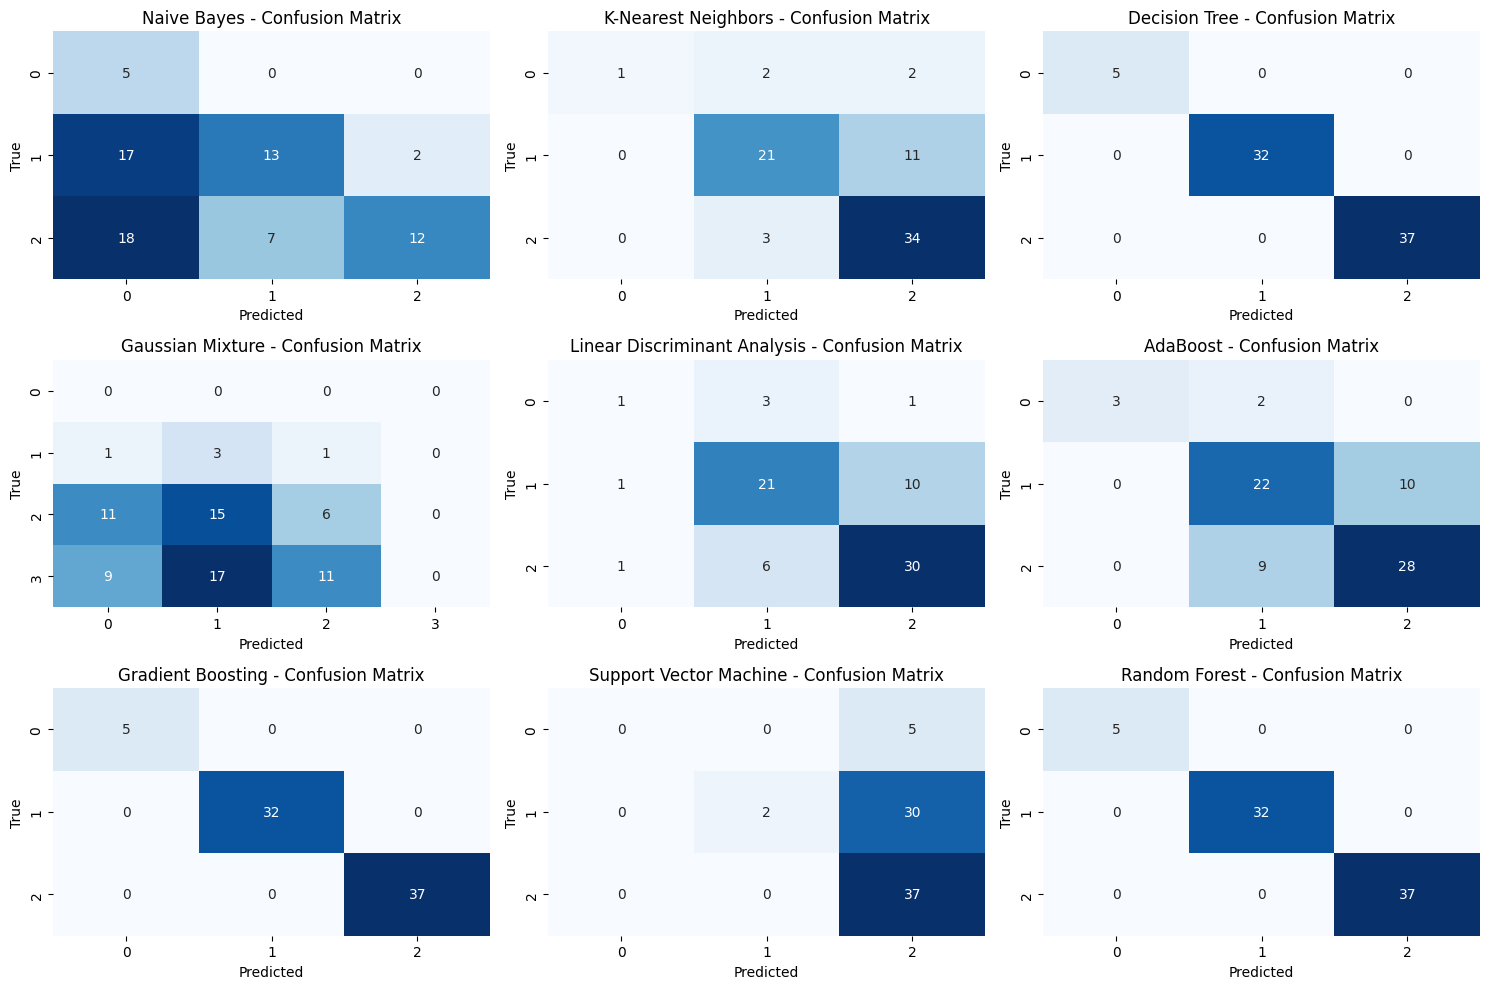

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (Previous code remains the same)

# Confusion Matrix for each classifier
plt.figure(figsize=(15, 10))
#plt.suptitle('Confusion Matrix for Classifiers', y=0.94)
for i, (clf, name) in enumerate(zip(classifiers, classifier_names)):
    clf.fit(X_transformed, y)
    y_pred = clf.predict(X_transformed)
    cm = confusion_matrix(y, y_pred)
    plt.subplot(3, 3, i + 1)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

### Grafi

Najprej moramo $X$ in $y$ dati v obliko, ki bo pythonu bolj vsec za cross validation

In [23]:
X = pd.DataFrame(X).to_numpy()
y = pd.DataFrame(y).to_numpy()

In [24]:
from operator import add
from functools import reduce

y = [reduce(add, lst) for lst in y]
y = np.array(y)

In [25]:
"""import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

kf = KFold(5,shuffle=False)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal', 'datalim')

for train, test in kf.split(X):
    model = LogisticRegression().fit(X[train], y[train])
    y_score = model.predict_proba(X[test])
    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])
    
    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b', 
         label=r"LR ROC (AUC = %0.2f $\pm$ %0.2f)" % (cross_val_score(LogisticRegression(), X, y, scoring="roc_auc", cv=5).mean(),
                                                          cross_val_score(LogisticRegression(), X, y, scoring="roc_auc", cv=5).std()))
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3, label="Interval 1 std")

plt.plot([0, 1], [0, 1],'r--', label="chance level (AUC = 0.5)")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()"""

<>:1: DeprecationWarning: invalid escape sequence '\p'
<>:1: DeprecationWarning: invalid escape sequence '\p'
C:\Users\borbr\AppData\Local\Temp\ipykernel_9440\2294744204.py:1: DeprecationWarning: invalid escape sequence '\p'
  """import matplotlib.pyplot as plt


'import matplotlib.pyplot as plt\nimport numpy as np\n\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import KFold\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import roc_curve\n\nkf = KFold(5,shuffle=False)\n\ntprs = []\nbase_fpr = np.linspace(0, 1, 101)\n\nplt.figure(figsize=(5, 5))\nplt.axes().set_aspect(\'equal\', \'datalim\')\n\nfor train, test in kf.split(X):\n    model = LogisticRegression().fit(X[train], y[train])\n    y_score = model.predict_proba(X[test])\n    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])\n    \n    plt.plot(fpr, tpr, \'b\', alpha=0.15)\n    tpr = np.interp(base_fpr, fpr, tpr)\n    tpr[0] = 0.0\n    tprs.append(tpr)\n\ntprs = np.array(tprs)\nmean_tprs = tprs.mean(axis=0)\nstd = tprs.std(axis=0)\n\ntprs_upper = np.minimum(mean_tprs + std, 1)\ntprs_lower = mean_tprs - std\n\n\nplt.plot(base_fpr, mean_tprs, \'b\', \n         label=r"LR ROC (AUC = %0.2f $\\pm$ %0.2f)" % (cross_val_score(LogisticRegr

In [26]:
"""import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve


kf = KFold(5,shuffle=False)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal', 'datalim')

for train, test in kf.split(X):
    model = SVC(probability=True).fit(X[train], y[train])
    y_score = model.predict_proba(X[test])
    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])
    
    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b', 
         label=r"SVC ROC (AUC = %0.2f $\pm$ %0.2f)" % (cross_val_score(SVC(), X, y, scoring="roc_auc", cv=5).mean(),
                                                          cross_val_score(SVC(), X, y, scoring="roc_auc", cv=5).std()))
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3, label="Interval 1 std")

plt.plot([0, 1], [0, 1],'r--', label="chance level (AUC = 0.5)")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()"""

<>:1: DeprecationWarning: invalid escape sequence '\p'
<>:1: DeprecationWarning: invalid escape sequence '\p'
C:\Users\borbr\AppData\Local\Temp\ipykernel_9440\1274876474.py:1: DeprecationWarning: invalid escape sequence '\p'
  """import matplotlib.pyplot as plt


'import matplotlib.pyplot as plt\nimport numpy as np\n\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import KFold\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import roc_curve\n\n\nkf = KFold(5,shuffle=False)\n\ntprs = []\nbase_fpr = np.linspace(0, 1, 101)\n\nplt.figure(figsize=(5, 5))\nplt.axes().set_aspect(\'equal\', \'datalim\')\n\nfor train, test in kf.split(X):\n    model = SVC(probability=True).fit(X[train], y[train])\n    y_score = model.predict_proba(X[test])\n    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])\n    \n    plt.plot(fpr, tpr, \'b\', alpha=0.15)\n    tpr = np.interp(base_fpr, fpr, tpr)\n    tpr[0] = 0.0\n    tprs.append(tpr)\n\ntprs = np.array(tprs)\nmean_tprs = tprs.mean(axis=0)\nstd = tprs.std(axis=0)\n\ntprs_upper = np.minimum(mean_tprs + std, 1)\ntprs_lower = mean_tprs - std\n\n\nplt.plot(base_fpr, mean_tprs, \'b\', \n         label=r"SVC ROC (AUC = %0.2f $\\pm$ %0.2f)" % (cross_val_score(SVC(), X